# Lesson 3, Part B: Show Data - Concise Summary

[Lesson 3](https://bcda-aps.github.io/bluesky_training/tutor/_lesson3a.html) demonstrated how bluesky can show data as it is acquired.  This notebook provides a concise summary, which should be a good general starting point for users.

**note**:  This tutorial expects to find an EPICS IOC on the local network configured as a synApps [`xxx`](https://github.com/epics-modules/xxx) IOC with prefix `sky:`.  A docker container is available to provide this IOC.  See this URL for instructions:  https://github.com/prjemian/epics-docker/blob/master/n3_synApps/README.md

In [1]:
%matplotlib inline

from ophyd import EpicsMotor
from ophyd.scaler import ScalerCH
from bluesky import RunEngine
import bluesky.plans as bp
from bluesky.callbacks.best_effort import BestEffortCallback
from apstools.devices import use_EPICS_scaler_channels

In [2]:
# for jupyterlab ...
# https://stackoverflow.com/a/51932652
# %matplotlib inline

In [3]:
RE = RunEngine({})
RE.subscribe(BestEffortCallback())

P = "gp:"  # or use your IOC's PV prefix here

m1 = EpicsMotor(f"{P}m1", name="m1")
scaler = ScalerCH(f"{P}scaler1", name="scaler")
m1.wait_for_connection()
scaler.wait_for_connection()
scaler.select_channels(None)

Count the detector (5 times)



Transient Scan ID: 1     Time: 2023-04-13 16:25:56
Persistent Unique Scan ID: 'acfc04de-dc2d-461b-9f7e-a19dd7f9535d'
New stream: 'primary'
+-----------+------------+------------+------------+------------+------------+------------+------------+
|   seq_num |       time |   timebase |         I0 |      scint |       I000 |        I00 |       roi1 |
+-----------+------------+------------+------------+------------+------------+------------+------------+
|         1 | 16:25:58.3 |   16000000 |          7 |          9 |          5 |          7 |          5 |
|         2 | 16:26:00.7 |   15000000 |          7 |          6 |          7 |          6 |          8 |
|         3 | 16:26:03.3 |   16000000 |          6 |          8 |          8 |          7 |          8 |
|         4 | 16:26:05.7 |   15000000 |          6 |          8 |          6 |          7 |          6 |
|         5 | 16:26:08.2 |   16000000 |          8 |         10 |          8 |          8 |          8 |
+-----------+------

('acfc04de-dc2d-461b-9f7e-a19dd7f9535d',)

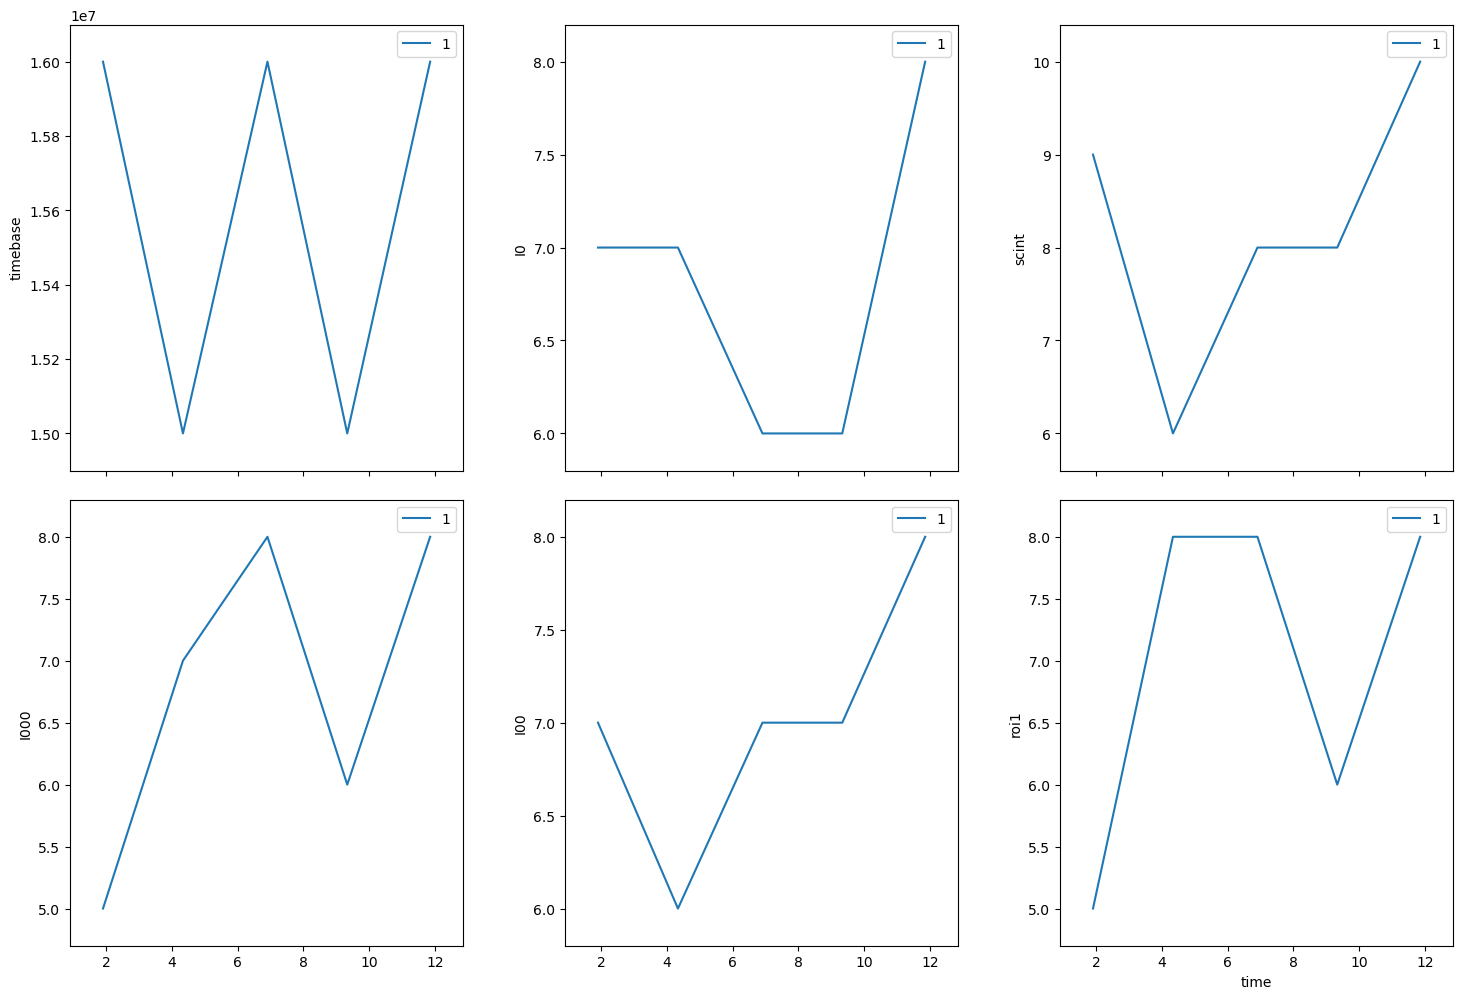

In [4]:
RE(bp.count([scaler], num=5))

Scan the scaler *vs.* the motor with 5 data points.



Transient Scan ID: 2     Time: 2023-04-13 16:26:10
Persistent Unique Scan ID: '7fb88d29-9b8e-45a7-8d8b-55a48ab6e288'
New stream: 'primary'
+-----------+------------+------------+------------+------------+------------+------------+------------+------------+
|   seq_num |       time |         m1 |   timebase |         I0 |      scint |       I000 |        I00 |       roi1 |
+-----------+------------+------------+------------+------------+------------+------------+------------+------------+
|         1 | 16:26:14.9 |     1.0000 |   16000000 |          8 |         10 |          7 |          7 |          7 |
|         2 | 16:26:18.3 |     2.0000 |   16000000 |          8 |          8 |          7 |          8 |          8 |
|         3 | 16:26:21.6 |     3.0000 |   16000000 |          7 |          9 |          7 |          6 |          8 |
|         4 | 16:26:24.9 |     4.0000 |   16000000 |          7 |          9 |          7 |          6 |          9 |
|         5 | 16:26:28.1 |     5.

('7fb88d29-9b8e-45a7-8d8b-55a48ab6e288',)

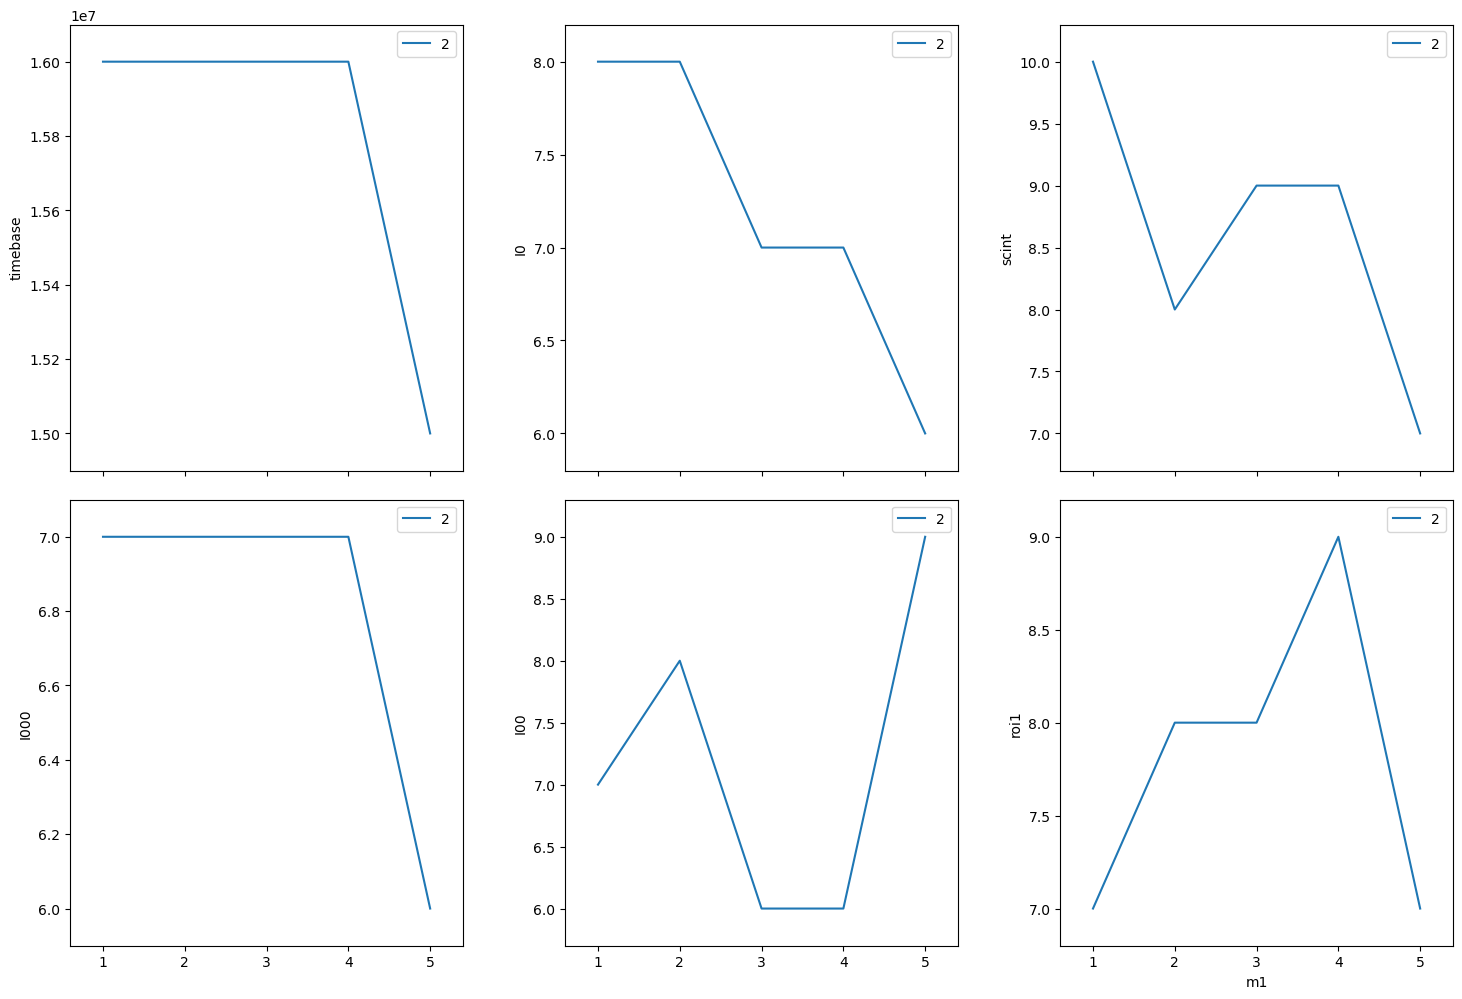

In [5]:
RE(bp.scan([scaler], m1, 1, 5, 5))